## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [1]:
import pandas as pd
oj = pd.read_csv('data/OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [2]:
import sklearn.cross_validation as cv
X = oj.iloc[:, 1:] 
Y = oj.iloc[:, 0] 

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).


In [3]:
### Splitting the data to see the shape
x_train, x_test, y_train, y_test = cv.train_test_split(X, 
                                                       Y, 
                                                       test_size=1.0/2, 
                                                       random_state=0)
#print "Original: " + str(spine.data.shape) + str(spine.target.shape)
print "Training: " + str(x_train.shape) + str(y_train.shape)
print "Test: " + str(x_test.shape) + str(y_test.shape)


Training: (535, 17)(535,)
Test: (535, 17)(535,)


In [4]:
# 1-Use SVM Default settings
from sklearn import svm


svm_model = svm.SVC()
svm_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
print ("Training error:",1-svm_model.score(x_train,y_train))
print ("Test error:",1-svm_model.score(x_test,y_test))

('Training error:', 0.22616822429906547)
('Test error:', 0.30280373831775698)


**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

In [8]:
### vary C parameter to check training & test error
from sklearn.cross_validation import cross_val_score
import numpy as np

test_coef = []
train_coef = []
c_100=[0.001, 0.01, 0.1,1,6.25055193e+00,   8.28642773e+00,10,4.49843267e+01,
         5.96362332e+01,   7.90604321e+01,100,1.12883789e+02,   2.33572147e+02,
         4.83293024e+02,1000]
for i in c_100:
    svm_model = svm.SVC(kernel = 'rbf', C = i, degree=3)
    #ridge_scores =cross_val_score(ridge_est, x, y, cv = 5)
    svm_model.fit(x_train,y_train)
    train_error = svm_model.score(x_train,y_train)
    #print np.sqrt(train_error)
    test_error = svm_model.score(x_test,y_test)
    test_coef.append(test_error)
    train_coef.append(train_error)

print train_coef
print test_coef

[0.60560747663551406, 0.60560747663551406, 0.64672897196261681, 0.77383177570093453, 0.84859813084112146, 0.8654205607476636, 0.87102803738317758, 0.88971962616822431, 0.89532710280373828, 0.90654205607476634, 0.90654205607476634, 0.91028037383177574, 0.9196261682242991, 0.92336448598130838, 0.93271028037383175]
[0.61495327102803743, 0.61495327102803743, 0.63738317757009344, 0.69719626168224302, 0.77757009345794392, 0.78691588785046729, 0.79439252336448596, 0.77757009345794392, 0.77570093457943923, 0.77196261682242995, 0.7570093457943925, 0.7570093457943925, 0.7570093457943925, 0.74579439252336444, 0.74953271028037383]


Populating the interactive namespace from numpy and matplotlib


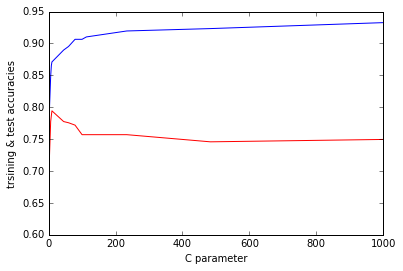

In [9]:
%pylab inline 
import matplotlib.pyplot as pl
pl.plot(c_100, train_coef)
pl.plot(c_100, test_coef, color='red')
pl.xlabel('C parameter')
pl.ylabel('trsining & test accuracies')

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.
    
(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
(3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [10]:
# Testing standard Decision Tree
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
tree_model.score(x_train,y_train)

0.99252336448598133

In [11]:
import sklearn.grid_search as gs
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}
grid_search_tree = gs.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [12]:
grid_search_tree.grid_scores_

[mean: 0.74766, std: 0.03662, params: {'criterion': 'gini', 'max_depth': 1},
 mean: 0.77009, std: 0.03684, params: {'criterion': 'gini', 'max_depth': 2},
 mean: 0.81308, std: 0.02689, params: {'criterion': 'gini', 'max_depth': 3},
 mean: 0.79626, std: 0.02991, params: {'criterion': 'gini', 'max_depth': 4},
 mean: 0.77757, std: 0.04488, params: {'criterion': 'gini', 'max_depth': 5},
 mean: 0.74206, std: 0.05492, params: {'criterion': 'gini', 'max_depth': 6},
 mean: 0.77757, std: 0.03475, params: {'criterion': 'gini', 'max_depth': 7},
 mean: 0.75327, std: 0.04778, params: {'criterion': 'gini', 'max_depth': 8},
 mean: 0.75888, std: 0.04416, params: {'criterion': 'gini', 'max_depth': 9},
 mean: 0.74579, std: 0.04076, params: {'criterion': 'gini', 'max_depth': 10},
 mean: 0.74393, std: 0.05025, params: {'criterion': 'gini', 'max_depth': 11},
 mean: 0.74393, std: 0.04142, params: {'criterion': 'gini', 'max_depth': 12},
 mean: 0.73645, std: 0.04568, params: {'criterion': 'gini', 'max_depth': 

In [13]:
# 3 Looking for best estimator
print ("Best Score:",grid_search_tree.best_score_)
print ("Best Combination:",grid_search_tree.best_params_)
print ("Best Estimator:",grid_search_tree.best_estimator_)

('Best Score:', 0.81495327102803738)
('Best Combination:', {'criterion': 'entropy', 'max_depth': 3})
('Best Estimator:', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))


In [14]:
tree_best = grid_search_tree.best_estimator_
tree_best.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
print ("Training error:",1-tree_best.score(x_train,y_train))
print ("Test error:",1-tree_best.score(x_test,y_test))
print ("Array of features:",tree_best.feature_importances_)

('Training error:', 0.17570093457943925)
('Test error:', 0.22056074766355138)
('Array of features:', array([ 0.02406062,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02832349,  0.        ,  0.79940582,  0.        ,
        0.03351326,  0.11469682,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ]))


In [19]:
# only 2 important features
tree_best.feature_importances_

array([ 0.02406062,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02832349,  0.        ,  0.79940582,  0.        ,
        0.03351326,  0.11469682,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

(4) What are the first 5 important features?

In [ ]:
### your solution

**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.
    
(2) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [21]:
#1- Using default Random forest parameters
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
print ("Training error:",1-randomForest.score(x_train,y_train))
print ("Test error:",1-randomForest.score(x_test,y_test))

('Training error:', 0.035514018691588767)
('Test error:', 0.22242990654205608)


In [23]:
# Checking for best combination
grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}
grid_search_forest = gs.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5)

In [24]:
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [25]:
print ("Best Score:",grid_search_forest.best_score_)
print ("Best Combination:",grid_search_forest.best_params_)
print ("Best Estimator:",grid_search_forest.best_estimator_)

('Best Score:', 0.82056074766355136)
('Best Combination:', {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3})
('Best Estimator:', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))


In [26]:
forest_best = grid_search_forest.best_estimator_
forest_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

(3) What's the first 5 important features?

In [27]:
print ("Training error:",1-forest_best.score(x_train,y_train))
print ("Test error:",1-forest_best.score(x_test,y_test))
print forest_best.feature_importances_

('Training error:', 0.17009345794392527)
('Test error:', 0.21121495327102802)
[ 0.04548647  0.08462034  0.01706913  0.01713001  0.00828449  0.02752075
  0.00182171  0.00643722  0.45331539  0.04469429  0.02692578  0.08411097
  0.03510983  0.01848861  0.01495879  0.06862561  0.0454006 ]


In [ ]:
### your solution